<a href="https://colab.research.google.com/github/chaithanya30478/Chaithanya/blob/main/bootcamp3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -q scikit-learn joblib matplotlib

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing
import joblib

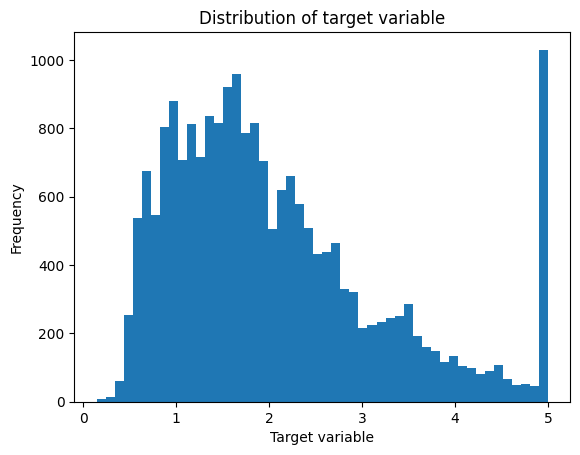

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing


housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target, name='MedHouseVal')

plt.hist(y, bins=50)
plt.title("Distribution of target variable")
plt.xlabel("Target variable")
plt.ylabel("Frequency")
plt.show()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train size:",X_train.shape,"Test size:" ,X_test.shape)

Train size: (16512, 8) Test size: (4128, 8)


In [12]:
reg_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(
        n_estimators=120,
        random_state=42))
])
reg_pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestRegressor(n_estimators=120, random_state=42))])

In [13]:
reg_pipeline.fit(X_train, y_train)
print("Training done!")

Training done!


In [19]:
# Generate predictions on the test set
from sklearn.metrics import r2_score
y_pred = reg_pipeline.predict(X_test)

# Calculate performance metrics
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

print(f"R2 Score (higher is better): {r2:.4f}")
print(f"RMSE (lower is better): {rmse:.4f}")

R2 Score (higher is better): 0.8055
RMSE (lower is better): 0.2549


In [17]:
# Perform 5-fold cross-validation on the training data
cv_scores = cross_val_score(
    reg_pipeline,
    X_train,
    y_train,
    cv=5,
    scoring="r2"
)

print("CV R2 Scores:", cv_scores)
print("Average CV Score:", cv_scores.mean())

CV R2 Scores: [0.80931094 0.7946512  0.80848738 0.80533601 0.80510276]
Average CV Score: 0.804577656001365


In [18]:
# Define a path and save the pipeline object
MODEL_PATH = "house_price_predictor.joblib"
joblib.dump(reg_pipeline, MODEL_PATH)

print(f"Model saved to {MODEL_PATH}")

Model saved to house_price_predictor.joblib
